## Data Wrangling 

In [ ]:
NAME: Aher Swami Sandip
ROLL NO. 01
COURSE: AI&DS
CLASS: BE
SUB:Computer Laboratory-I (DMV)

In [ ]:
Problem Statement: Data Wrangling on Real Estate Market 
Dataset: "RealEstate_Prices.csv" 
Description: The dataset contains information about housing prices in a specific real estate 
market. It includes various attributes such as property characteristics, location, sale prices, 
and other relevant features. The goal is to perform data wrangling to gain insights into the 
factors influencing housing prices and prepare the dataset for further analysis or modeling. 
Tasks to Perform: 

### 1.  Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 

In [2]:
df=pd.read_csv("Real_estate_prices.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  100 non-null    object 
 1   region            100 non-null    object 
 2   product_category  100 non-null    object 
 3   quantity_sold     54 non-null     float64
 4   sales_amount      100 non-null    float64
 5   customer_name     100 non-null    object 
 6   transaction_id    100 non-null    object 
 7   payment_method    100 non-null    object 
dtypes: float64(2), object(6)
memory usage: 6.4+ KB


In [4]:
df.head()

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
0,08-10-23,East,Home Decor,NaN,248.92,Kimberly Harrell,31e95718-0802-4674-9762-14cf69283244,Cash
1,23-03-22,South,Clothing,7.1,693.23,Andrea Sanchez,8d2c815a-820b-458e-868a-94c9f195b91c,Cash
2,02-06-23,East,Home Decor,7.5,387.35,Tina Stewart,800fadd9-7adc-453e-a17f-269186dda67c,Credit Card
3,23-08-22,South,Electronics,NaN,301.83,Bryan Hodges,71f4e452-a8c9-4b8c-acb2-efd9e72d8aed,UPI
4,19-10-22,South,Books,NaN,444.63,Lauren Graham,4eb9527f-2cc5-408f-a6b3-dad10df7f682,Cash


In [5]:
# Example of cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
0,08-10-23,East,Home Decor,NaN,248.92,Kimberly Harrell,31e95718-0802-4674-9762-14cf69283244,Cash
1,23-03-22,South,Clothing,7.1,693.23,Andrea Sanchez,8d2c815a-820b-458e-868a-94c9f195b91c,Cash
2,02-06-23,East,Home Decor,7.5,387.35,Tina Stewart,800fadd9-7adc-453e-a17f-269186dda67c,Credit Card
3,23-08-22,South,Electronics,NaN,301.83,Bryan Hodges,71f4e452-a8c9-4b8c-acb2-efd9e72d8aed,UPI
4,19-10-22,South,Books,NaN,444.63,Lauren Graham,4eb9527f-2cc5-408f-a6b3-dad10df7f682,Cash


#### 2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., imputation or removal). 

In [6]:
df.isnull().sum()

transaction_date     0
region               0
product_category     0
quantity_sold       46
sales_amount         0
customer_name        0
transaction_id       0
payment_method       0
dtype: int64

In [7]:
# Calculate mean_value
mean_value = df['quantity_sold'].mean()

# Fill missing values in 'quantity_sold' column with mean_value
df.fillna({'quantity_sold': mean_value}, inplace=True)


In [8]:
df.isnull().sum()

transaction_date    0
region              0
product_category    0
quantity_sold       0
sales_amount        0
customer_name       0
transaction_id      0
payment_method      0
dtype: int64

#### 3. Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities). 

In [9]:
newdf = df.copy()
newdf['transaction_id'] = newdf['transaction_id'] + ', ' + newdf['payment_method']
newdf

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
0,08-10-23,East,Home Decor,5.344444,248.92,Kimberly Harrell,"31e95718-0802-4674-9762-14cf69283244, Cash",Cash
1,23-03-22,South,Clothing,7.100000,693.23,Andrea Sanchez,"8d2c815a-820b-458e-868a-94c9f195b91c, Cash",Cash
2,02-06-23,East,Home Decor,7.500000,387.35,Tina Stewart,"800fadd9-7adc-453e-a17f-269186dda67c, Credit Card",Credit Card
3,23-08-22,South,Electronics,5.344444,301.83,Bryan Hodges,"71f4e452-a8c9-4b8c-acb2-efd9e72d8aed, UPI",UPI
4,19-10-22,South,Books,5.344444,444.63,Lauren Graham,"4eb9527f-2cc5-408f-a6b3-dad10df7f682, Cash",Cash
...,...,...,...,...,...,...,...,...
95,17-02-25,South,Books,9.100000,166.44,Christine Harris,"f2684ed1-b047-4101-aa9e-c5ba24231a47, Online B...",Online Banking
96,30-10-24,North,Electronics,2.700000,593.38,Robert Rice,"f5bf39c6-e206-4628-b7e8-7bc80e9be58c, Credit Card",Credit Card
97,04-01-22,East,Home Decor,5.344444,974.94,Scott Maynard,"79bef9aa-78f7-40cf-8e61-eb8d920b0f54, UPI",UPI
98,16-04-23,East,Electronics,5.800000,424.10,Connor Cook,"6bf64b65-15da-412c-a6f6-fc2dea1e6fea, Credit Card",Credit Card


### 4. Filter and subset the data based on specific criteria, such as a particular time period, property type, or location. 

In [10]:
#filter and subset data
filtered_df = df[(df['region'] == 'West') & (df['sales_amount'] > 900)]
filtered_df

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
43,14-03-22,West,Home Decor,5.5,997.49,Blake Johnson,eb42e829-cc2d-4961-86d5-33f1651e47b3,UPI
67,15-05-24,West,Home Decor,6.1,920.48,Bobby Larsen,ba3a4522-8999-4517-a1ff-9a6df2cbf044,Credit Card


### 5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or  encoding) for further analysis.

In [11]:
df1 = pd.get_dummies(df, columns=['payment_method', 'region', 'customer_name','product_category'], drop_first=True)
df1

,transaction_date,quantity_sold,sales_amount,transaction_id,payment_method_Credit Card,payment_method_Online Banking,payment_method_UPI,region_North,region_South,region_West,...,customer_name_Teresa Bradley,customer_name_Thomas Davis,customer_name_Tiffany Chapman,customer_name_Tiffany Howard,customer_name_Tina Stewart,customer_name_Tonya Blevins,product_category_Clothing,product_category_Electronics,product_category_Furniture,product_category_Home Decor
0,08-10-23,5.344444,248.92,31e95718-0802-4674-9762-14cf69283244,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,23-03-22,7.100000,693.23,8d2c815a-820b-458e-868a-94c9f195b91c,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,02-06-23,7.500000,387.35,800fadd9-7adc-453e-a17f-269186dda67c,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,23-08-22,5.344444,301.83,71f4e452-a8c9-4b8c-acb2-efd9e72d8aed,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,19-10-22,5.344444,444.63,4eb9527f-2cc5-408f-a6b3-dad10df7f682,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17-02-25,9.100000,166.44,f2684ed1-b047-4101-aa9e-c5ba24231a47,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
96,30-10-24,2.700000,593.38,f5bf39c6-e206-4628-b7e8-7bc80e9be58c,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
97,04-01-22,5.344444,974.94,79bef9aa-78f7-40cf-8e61-eb8d920b0f54,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
98,16-04-23,5.800000,424.10,6bf64b65-15da-412c-a6f6-fc2dea1e6fea,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### 6.Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.

In [12]:
average_sale_price_by_location = df.groupby('region')['sales_amount'].mean()
average_sale_price_by_location

region
East     602.457917
North    487.056897
South    511.385200
West     564.120000
Name: sales_amount, dtype: float64

### 7. Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process. 

<Axes: >

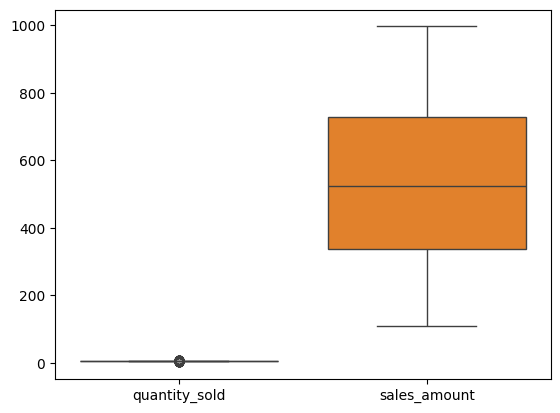

In [13]:

sns.boxplot(df)

In [14]:
def handle_outliers_with_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data, outliers


In [15]:
df, outliers = handle_outliers_with_iqr(df, 'sales_amount')
outliers

# as we can see in box plot there are no outliers might be because the dataset was already preprocessed

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
